# Początek zabawy z danymi

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [154]:
RANDOM_SEED = 1

In [155]:
df=pd.read_csv('zbiór_8.csv')

In [156]:
df

,szczegolnaFormaPrawna_Symbol,formaWlasnosci_Symbol,pkdKod,wsk_liczba_dni_istnienia,Aktywa,Aktywa_trwale,Wartosci_niematerialne_prawne,Wartosc_firmy,Rzeczowe_aktywa_trwale,Srodki_trwale,...,wsk_struktura_kap_wlasnego_s_1,wsk_struktura_kap_wlasnego_s_2,wsk_zadluzenia,wsk_zob_dlugoterminowe_aktywa_rzeczowe,wsk_zob_oprocentowanych,wsk_zob_oprocentowanych_aktywa_rzeczowe,wsk_struktura_kap_obcego_s,wsk_zob_s_aktywa_rzeczowe,wsk_fin_majatku_kapitalem,default
0,117,214,7010,4732,31576.85,1000.00,0.00,0.0,0.00,0.00,...,0.533280,0.533280,0.875189,0.466720,0.000000,0.000000,0.466720,0.466720,0.518016,1
1,117,214,4719,3344,10000.00,0.00,0.00,0.0,0.00,0.00,...,0.345640,0.345640,1.893184,0.654360,0.000000,0.000000,0.654360,0.654360,0.345640,1
2,117,215,119,1438,47031653.46,43499012.39,3279.42,0.0,43495732.97,43495732.97,...,0.006746,0.006811,145.736447,0.918424,0.918360,0.918424,0.993254,0.983714,-12.222723,1
3,117,214,111,1811,4323.31,0.00,0.00,0.0,0.00,0.00,...,0.997594,inf,0.002411,0.000000,0.000000,0.000000,0.002406,-0.997594,0.997594,1
4,117,216,6910,1292,454824.30,5109.11,5109.11,0.0,0.00,0.00,...,0.323581,0.697087,2.019511,0.133418,0.000143,0.000145,0.676419,0.140609,0.364058,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,117,214,6201,4314,2406323.55,0.00,0.00,0.0,0.00,0.00,...,0.631274,0.986189,0.584098,0.000000,0.000000,0.000000,0.368726,0.008841,0.631274,0
2996,117,214,7990,1370,18379.63,0.00,0.00,0.0,0.00,0.00,...,0.816179,0.816179,0.225222,0.183821,0.000000,0.000000,0.183821,0.183821,0.816179,0
2997,117,214,5814,2585,63890.31,9800.06,0.00,0.0,0.00,0.00,...,0.142685,0.142685,6.008444,0.857315,0.000000,0.000000,0.857315,0.857315,-0.012643,0
2998,117,215,4120,7853,14173664.14,14062140.06,0.00,0.0,14062140.06,1237803.53,...,0.744294,0.744299,0.343556,0.219826,0.074269,0.074269,0.255706,0.255700,-31.497876,0


In [157]:
df_train, df_tmp = train_test_split(df, train_size=0.7, stratify=df['default'], random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_tmp, test_size=0.5, stratify=df_tmp['default'], random_state=RANDOM_SEED)

## EDA

In [158]:
df_train[['pkdKod','szczegolnaFormaPrawna_Symbol','formaWlasnosci_Symbol']].value_counts().head()

pkdKod  szczegolnaFormaPrawna_Symbol  formaWlasnosci_Symbol
6201    117                           214                      58
6920    117                           214                      54
6820    117                           214                      50
7022    117                           214                      47
4120    117                           214                      46
Name: count, dtype: int64

In [159]:
df_train[['szczegolnaFormaPrawna_Symbol']].value_counts().head()

szczegolnaFormaPrawna_Symbol
117                             2100
Name: count, dtype: int64

In [160]:
df_train[['formaWlasnosci_Symbol']].value_counts()

formaWlasnosci_Symbol
214                      1393
215                       201
216                       165
0                         129
224                        58
226                        47
225                        36
227                        31
113                        20
112                         9
234                         3
111                         3
235                         3
133                         2
Name: count, dtype: int64

In [161]:
df_train['schemat_wsk_rzis'].value_counts()

schemat_wsk_rzis
SFJIN    1173
SFJMI     530
SFJMA     397
Name: count, dtype: int64

#### Znaczenie najczęściej występujących kodów PKD:
- 6201 - oprogramowanie
- 6920 - rachunki, księgowość, doradztwo podatkowe
- 6820 - nieruchomości własne
- 7022 - doradztwo
- 4120 - roboty do wznoszenia budynków

Kolumna szczególna forma prawna przyjmuje tylko jedną wartość, więc do usunięcia.

### Analiza wartości brakujących

#### Czy braki są zależne od PKD?

In [162]:
cols_to_check = [
    'Aktywa', 'Aktywa_obrotowe', 'Aktywa_trwale', 'amortyzacja',
    'dotacje', 'dywidendy_udzialy', 'Inne_rozliczenia_miedzyokresowe',
    'Kapital_podstawowy', 'Kapital_wlasny', 'Kredyty_pozyczki',
    'Naleznosci_krotkoterminowe', 'Srodki_pieniezne', 'Zapasy',
    'Zobowiazania_krotkoterminowe', 'Zobowiazania_dlugoterminowe',
    'Zysk_netto', 'zysk_operacyjny'
]
top_pkd = df_train['pkdKod'].value_counts().head(20).index

In [163]:
df_top_pkd = df_train[df_train['pkdKod'].isin(top_pkd)]

zeros_na_ratio_top = df_top_pkd.groupby('pkdKod')[cols_to_check].apply(lambda x: ((x.isna()) | (x==0)).mean())

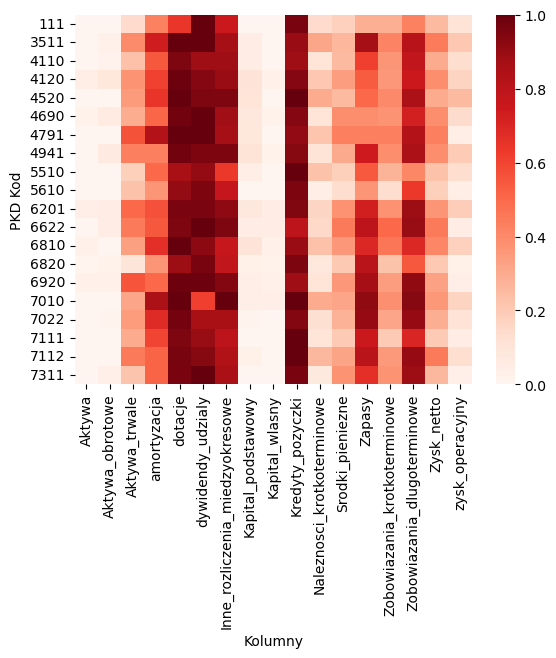

In [164]:
sns.heatmap(zeros_na_ratio_top, cmap='Reds')
plt.xlabel('Kolumny')
plt.ylabel('PKD Kod')
plt.show()

##### Nie widać specjalnej zależności

In [165]:
miss = df_train.isna().sum().sort_values(ascending=False)
miss[miss > 0]

RP_przeplywy_operacyjne             2077
wsk_pokrycie_zob_kr_gotowkowe_2     2077
wsk_zadluzenia_gotowki_2            2077
wsk_akt_generowania_got_2           2077
wsk_pokrycie_wyd_fin_gotowkowe_2    2077
wsk_zysk_CF_operacyjny              2077
RP_amortyzacja                      2018
wsk_plynnosc_biez_1                   65
wsk_kapital_do_aktywa                 29
wsk_struktura_kap_wlasnego_s_2        29
dtype: int64

##### Dane do usunięcia:
wsk_pokrycie_zob_kr_gotowkowe_2     2077

wsk_zadluzenia_gotowki_2            2077

wsk_akt_generowania_got_2           2077

wsk_pokrycie_wyd_fin_gotowkowe_2    2077

wsk_zysk_CF_operacyjny              2077

Te 5 kolumn równe zero najpewniej dlatego, że RP_przeplywy operacyjne, RP_amortyzacja równe 0 - przepływy operacyjne z tymi kolumnami potencjalnie do usunięcia.



#### Wartości inf

In [166]:
numeric_cols = df_train.select_dtypes(include=[np.number])

inf_counts = np.isinf(numeric_cols).sum()

inf_counts[inf_counts > 0]


wsk_kapital_do_aktywa               4
wsk_plynnosc_biez_1               640
wsk_struktura_kap_wlasnego_s_2     73
dtype: int64

In [167]:
df_train["wsk_kapital_do_aktywa"].describe()

count    2071.000000
mean             inf
std              NaN
min        -0.535175
25%         0.352406
50%         0.667487
75%         0.912225
max              inf
Name: wsk_kapital_do_aktywa, dtype: float64

In [168]:
(df_train["Aktywa"] == 0).sum()

np.int64(33)

In [169]:
print((df_train["Kapital_wlasny"] == 0).sum(), (df_train["Zobowiazania_krotkoterminowe"] == 0).sum())


48 708


##### Wszystkie inf/nan we wskaznikach biorą się z braków odpowiadających im danych

In [170]:
threshold = 0.5

numeric_cols = df_train.select_dtypes(include=['number']).columns

zero_percentage = (df_train[numeric_cols] == 0).sum() / len(df_train)

cols_many_zeros = zero_percentage[zero_percentage > threshold].index.tolist()

cols_many_zeros = [col for col in cols_many_zeros 
                   if not col.startswith('wsk') 
                   and col != 'pkdKod' 
                   and col != 'default']
print(len(cols_many_zeros))

54


### Wyznaczenie kolumn do imputacji danych brakujących

In [171]:
manual_cols = ['szczegolnaFormaPrawna_Symbol', 'RP_przeplywy_operacyjne', 'RP_amortyzacja', 'wsk_pokrycie_zob_kr_gotowkowe_2', 'wsk_zadluzenia_gotowki_2', 'wsk_akt_generowania_got_2', 'wsk_pokrycie_wyd_fin_gotowkowe_2', 'wsk_zysk_CF_operacyjny', 'schemat_wsk_bilans']
to_remove = manual_cols + cols_many_zeros
len(to_remove)

63

In [172]:

df_train = df_train.drop(columns=to_remove)

In [173]:
all_cols = df_train.columns

cols_not_wsk = [col for col in all_cols if not col.startswith('wsk')]

cols_not_wsk

['formaWlasnosci_Symbol',
 'pkdKod',
 'Aktywa',
 'Aktywa_trwale',
 'Aktywa_obrotowe',
 'Naleznosci_krotkoterminowe',
 'Inwestycje_krotkoterminowe',
 'Srodki_pieniezne',
 'Kapital_wlasny',
 'Kapital_podstawowy',
 'Zysk_netto',
 'Zobowiazania_rezerwy',
 'Zobowiazania_krotkoterminowe',
 'przychody_sprzedazy',
 'zysk_sprzedazy',
 'pozostale_przychody_oper',
 'koszty_operacyjne_pozostale',
 'zysk_operacyjny',
 'koszty_finansowe',
 'zysk_brutto',
 'podatek_dochodowy',
 'zysk_netto',
 'koszty_operacyjne',
 'schemat_wsk_rzis',
 'przychody',
 'default']

In [174]:
n_rows = len(df_train)
cols_5_50_percent = []
for col in cols_not_wsk:
    missing_ratio = ((df_train[col].isna()) | (df_train[col] == 0)).sum() / n_rows
    if 0.05 <= missing_ratio <= 0.5:
        cols_5_50_percent.append(col)

print("Kolumny z 5-50% braków (NaN lub 0):")
print(cols_5_50_percent)

Kolumny z 5-50% braków (NaN lub 0):
['formaWlasnosci_Symbol', 'Aktywa_trwale', 'Naleznosci_krotkoterminowe', 'Inwestycje_krotkoterminowe', 'Srodki_pieniezne', 'Kapital_podstawowy', 'Zysk_netto', 'Zobowiazania_rezerwy', 'Zobowiazania_krotkoterminowe', 'przychody_sprzedazy', 'zysk_sprzedazy', 'pozostale_przychody_oper', 'koszty_operacyjne_pozostale', 'zysk_operacyjny', 'koszty_finansowe', 'zysk_brutto', 'podatek_dochodowy', 'zysk_netto', 'koszty_operacyjne', 'przychody']


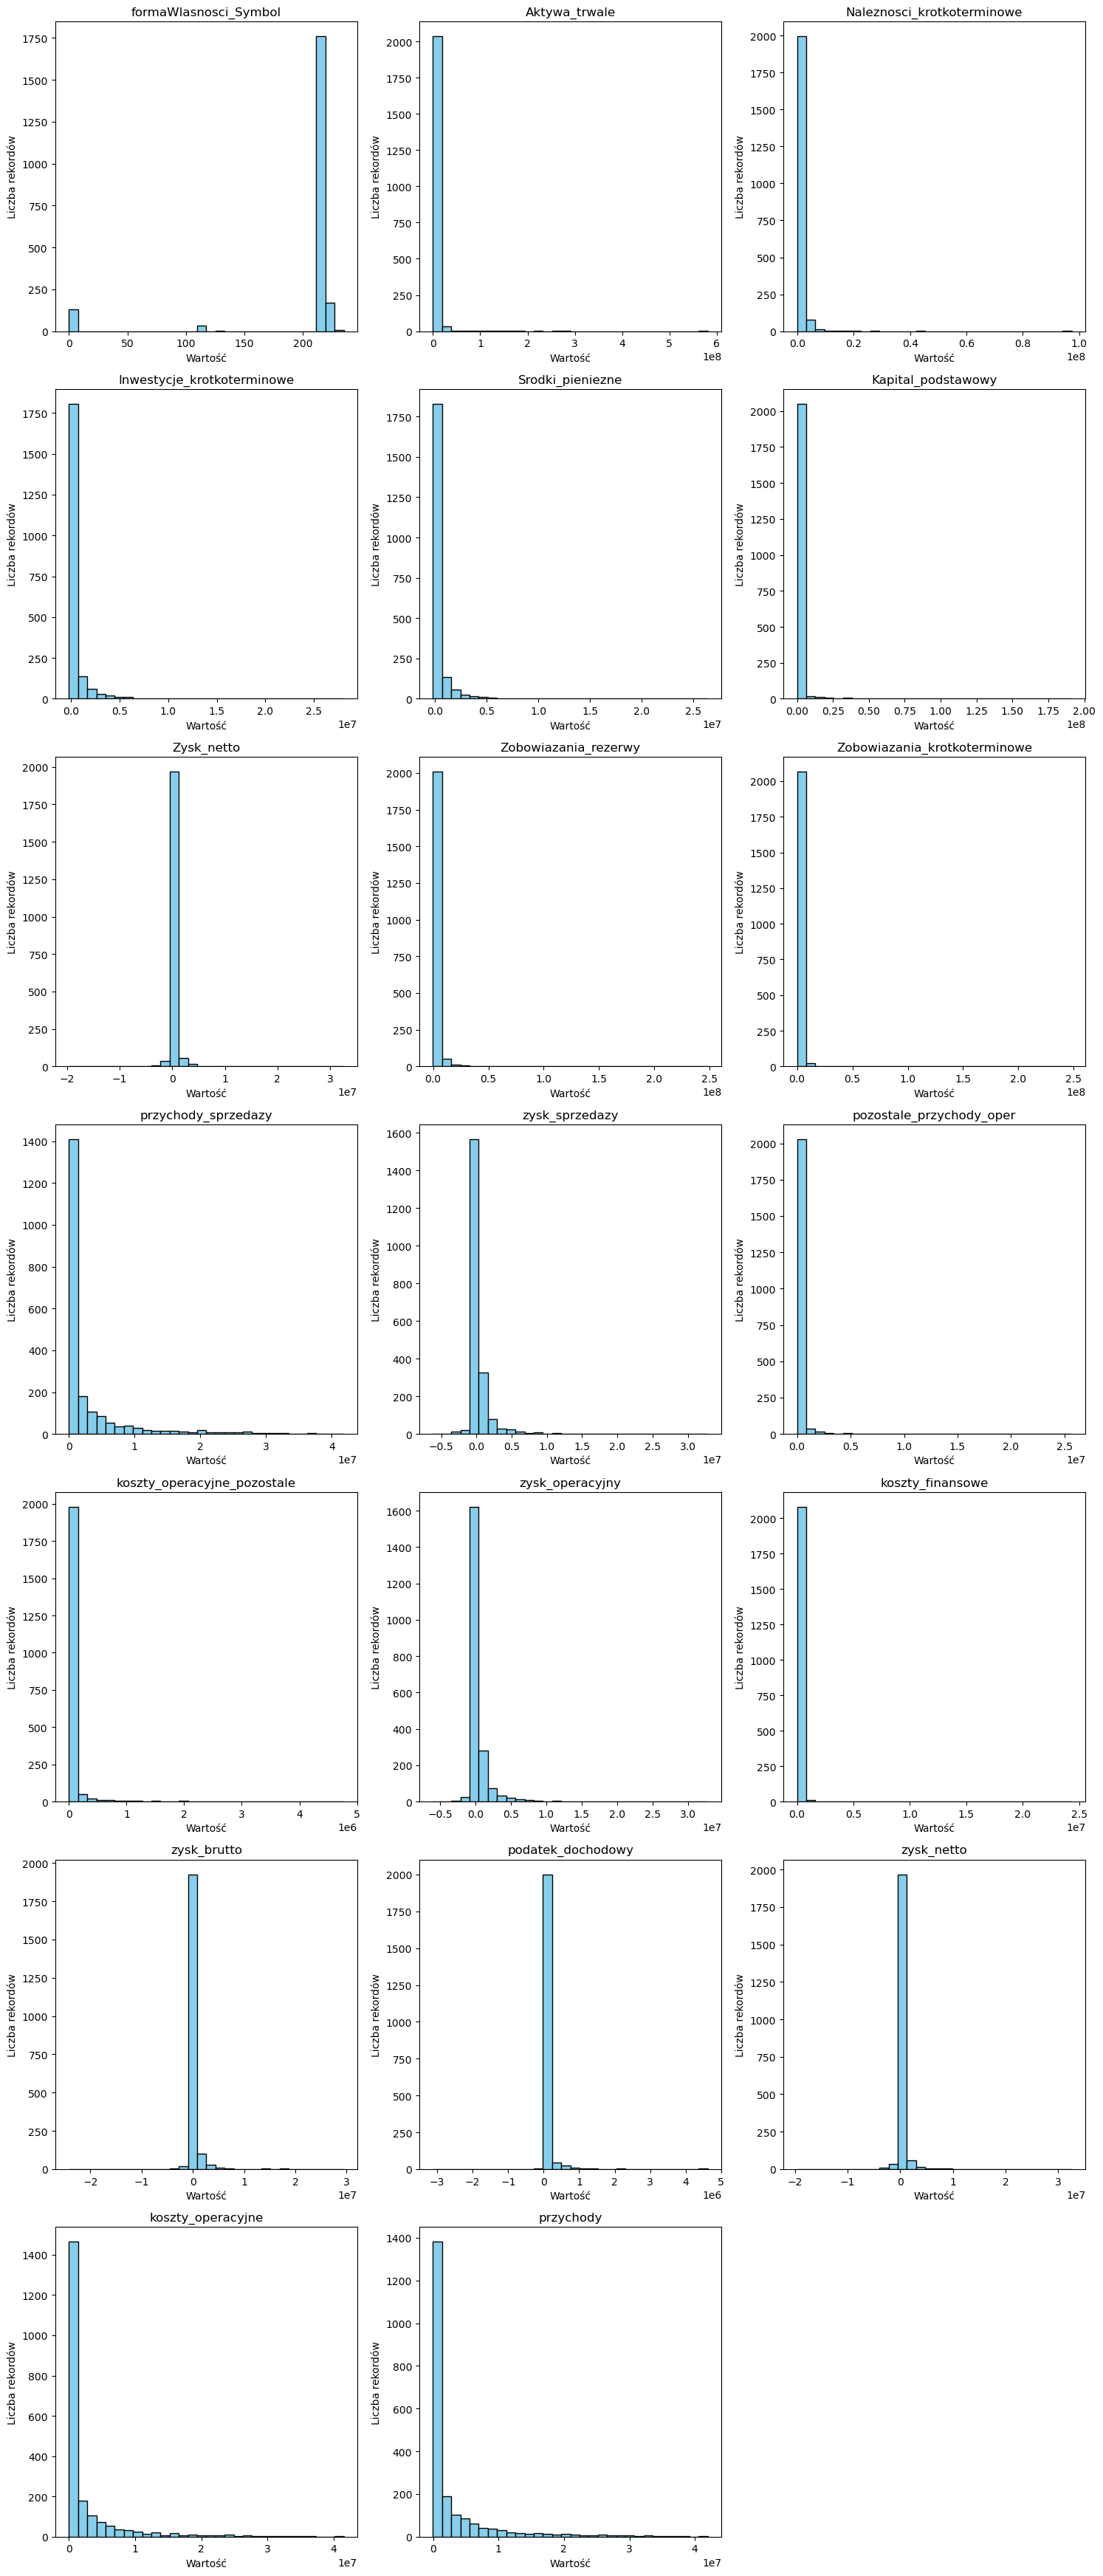

In [175]:
n_cols = len(cols_5_50_percent)
n_rows = (n_cols // 3) + 1 

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_5_50_percent):
    axes[i].hist(df_train[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Wartość')
    axes[i].set_ylabel('Liczba rekordów')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Rozkłady skośne - do imputacji lepsza może być mediana

##### Kolumny ze wskaźnikami, które mają 0/nan

In [176]:
wsk_cols = [col for col in df_train.columns if col.startswith('wsk')]

wsk_cols_with_issues = [col for col in wsk_cols 
                        if df_train[col].isna().any() or (df_train[col] == 0).any()]

In [177]:
len(wsk_cols_with_issues)

130

#### Trzeba sprawdzić, które wskaźniki można uzupełnić po zaimputowaniu kolumn medianą; pozostałe do usunięcia

In [178]:
cols_to_impute = [
    'Aktywa', 'Aktywa_trwale', 'Aktywa_obrotowe', 'Naleznosci_krotkoterminowe',
    'Inwestycje_krotkoterminowe', 'Srodki_pieniezne', 'Kapital_wlasny', 'Kapital_podstawowy',
    'Zysk_netto', 'Zobowiazania_rezerwy', 'Zobowiazania_krotkoterminowe',
    'przychody_sprzedazy', 'zysk_sprzedazy', 'pozostale_przychody_oper', 'koszty_operacyjne_pozostale',
    'zysk_operacyjny', 'koszty_finansowe', 'zysk_brutto', 'podatek_dochodowy',
]

for col in cols_to_impute:
    median_val = df_train.loc[df_train[col] != 0, col].median()
    df_train[col] = df_train[col].replace(0, np.nan)     
    df_train[col].fillna(median_val, inplace=True)  

mode_val = df_train['formaWlasnosci_Symbol'].mode()[0]
df_train['formaWlasnosci_Symbol'].fillna(mode_val, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_25560\317216502.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(median_val, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_25560\317216502.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [179]:
groups = {
    '<5%': ['wsk_kapital_do_aktywa', 'wsk_struktura_kap_wlasnego_s_2'],
    '5-20%': [],
    '20-50%': ['wsk_plynnosc_biez_1'],
    '>50%': []
}


### Podejście do wskaźników - z powodu imputowania wartości niebędących wskaźnikami medianą liczenie na nowo wskaźników wydaje się być bez sensu - uzupełnimy je medianą

In [180]:
percent_missing = (
    ((df_train[wsk_cols].isna() | (df_train[wsk_cols] == 0)).sum() / len(df_train)) * 100
)

for col, pct in percent_missing.items():
    if pct < 5:
        groups['<5%'].append(col)
    elif pct < 20:
        groups['5-20%'].append(col)
    elif pct < 50:
        groups['20-50%'].append(col)
    else:
        groups['>50%'].append(col)

In [181]:
{k: len(v) for k, v in groups.items()}

{'<5%': 28, '5-20%': 34, '20-50%': 57, '>50%': 15}

#### Sprawdzenie które z kolumn 20-50% mają wysokie korelacje z targetem - potencjalnie do zachowania

In [182]:
cols_20_50 = groups['20-50%']

In [183]:
correlations = df_train[cols_20_50 + ['default']].corr()['default'].drop('default')

sorted_correlations = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

print(sorted_correlations)

wsk_udzial_zob_biez_aktywa_1              0.064611
wsk_marza_brutto_1                       -0.062182
wsk_marza_ebitda_2                       -0.061692
wsk_obrotowosc_gotowkowa                 -0.044701
wsk_ebitda_1                             -0.041054
wsk_ebitda_2                             -0.040659
wsk_Zobowiazania_krotkoterminowe          0.037191
wsk_ebit                                 -0.032188
wsk_rotacja_zobowiazan_dostaw_uslug       0.026871
wsk_Zobowiazania_dlugoterminowe           0.025404
wsk_zadluzenia_krotkie                    0.023411
wsk_zysk_zobowiazania                    -0.019087
wsk_rent_kaptial_podstawowy              -0.018462
wsk_rotacja_aktywow_1                    -0.018339
wsk_rotacja_naleznosci_dostaw_uslug      -0.017755
wsk_zysk_ebitda_3                        -0.017051
wsk_udzial_zob_biez_sprzedaz_1            0.016492
wsk_rotacja_zobowiazan                    0.016433
wsk_ROE_brutto                           -0.015829
wsk_rotacja_wartosci_niewateria

##### Żadna korelacja nie jest wysoka - można je usunąć

In [184]:
for group in ['<5%', '5-20%']:
    for col in groups[group]:
        if col in df_train.columns:
            median_value = df_train[col].median()
            df_train[col].fillna(median_value, inplace=True)

cols_to_drop = groups['20-50%'] + groups['>50%']
df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns], inplace=True)
df_train

C:\Users\User\AppData\Local\Temp\ipykernel_25560\3851939252.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(median_value, inplace=True)


,formaWlasnosci_Symbol,pkdKod,wsk_liczba_dni_istnienia,Aktywa,Aktywa_trwale,Aktywa_obrotowe,Naleznosci_krotkoterminowe,Inwestycje_krotkoterminowe,Srodki_pieniezne,Kapital_wlasny,...,wsk_sytuacji_fin,wsk_struktura_kap_wlasnego_1,wsk_struktura_kap_wlasnego_2,wsk_struktura_kap_wlasnego_s_1,wsk_struktura_kap_wlasnego_s_2,wsk_zadluzenia,wsk_struktura_kap_obcego_s,wsk_zob_s_aktywa_rzeczowe,wsk_fin_majatku_kapitalem,default
904,214,4729,3662,91107.04,212043.35,91107.04,21954.74,54328.97,54328.970,45448.56,...,0.009954,0.498848,0.498848,0.498848,1.235752,1.004619,0.501152,-0.095168,0.498848,0
1715,216,4799,7638,10597590.84,542791.59,10054799.25,2929930.76,4840509.49,4840509.490,9194640.66,...,121.403947,0.867616,0.867616,0.867616,1.597101,0.152583,0.132384,-0.324372,0.860470,0
1449,214,4120,8455,6749456.93,1065720.31,5683736.62,63255.08,5116154.75,5116154.750,5521951.70,...,23.991641,0.818133,0.818133,0.818133,3.380851,0.222296,0.181867,-0.576143,0.784032,0
894,214,6820,2757,1865470.78,1813940.28,51530.50,32796.23,13146.96,13146.960,136454.70,...,0.002242,0.073148,0.073148,0.073148,0.073667,12.670990,0.926852,0.919805,-32.553256,0
1575,215,4110,1406,29969051.69,24511766.18,5457285.51,2127734.63,3192963.03,3192963.030,15279609.67,...,0.231584,0.509846,0.509846,0.509846,0.570644,0.961375,0.490154,0.383612,-1.691712,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,214,6920,1651,322516.81,212043.35,322516.81,39636.13,114666.09,114666.090,120009.92,...,0.005926,0.372104,0.372104,0.372104,0.577385,1.687418,0.627896,0.272360,0.372104,0
2480,214,6499,1671,323971.15,600.00,323371.15,232425.00,118876.75,101457.225,155095.15,...,494.971626,0.478731,0.478731,0.478731,0.478731,1.088854,0.521269,0.521269,0.477764,0
748,214,6312,2618,117059.94,212043.35,117059.94,123.00,116936.94,597.910,50955.75,...,0.007708,0.435296,0.435296,0.435296,0.437531,1.297286,0.564704,-0.434245,0.435296,0
2866,216,4647,1826,2698161.13,34.67,2698126.46,380212.74,32785.06,32785.060,1180432.27,...,60527.862924,0.437495,0.437495,0.437495,0.442876,1.285740,0.562505,0.550354,0.437488,0


#### Spliting categorical and numerical columns

In [185]:
cat_cols = ['formaWlasnosci_Symbol', 'pkdKod', 'schemat_wsk_rzis'] 

num_cols = [col for col in df_train.columns if col not in cat_cols]

cat_cols.append('default')

In [186]:
df_num = df_train[num_cols].copy()
df_cat = df_train[cat_cols].copy()

#### Outlier capping - IQR method

In [187]:
cols_to_cap = df_num.select_dtypes(include='number').columns.tolist()

for col in cols_to_cap:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    below = (df_train[col] < lower).sum()
    above = (df_train[col] > upper).sum()
    
    print(f"{col}: {below} poniżej, {above} powyżej ")

wsk_liczba_dni_istnienia: 0 poniżej, 58 powyżej 
Aktywa: 0 poniżej, 290 powyżej 
Aktywa_trwale: 0 poniżej, 385 powyżej 
Aktywa_obrotowe: 0 poniżej, 281 powyżej 
Naleznosci_krotkoterminowe: 0 poniżej, 287 powyżej 
Inwestycje_krotkoterminowe: 0 poniżej, 332 powyżej 
Srodki_pieniezne: 0 poniżej, 324 powyżej 
Kapital_wlasny: 0 poniżej, 303 powyżej 
Kapital_podstawowy: 0 poniżej, 368 powyżej 
Zysk_netto: 132 poniżej, 359 powyżej 
Zobowiazania_rezerwy: 0 poniżej, 300 powyżej 
Zobowiazania_krotkoterminowe: 0 poniżej, 345 powyżej 
wsk_kapital_do_aktywa: 1 poniżej, 10 powyżej 
przychody_sprzedazy: 0 poniżej, 287 powyżej 
zysk_sprzedazy: 73 poniżej, 318 powyżej 
pozostale_przychody_oper: 0 poniżej, 368 powyżej 
koszty_operacyjne_pozostale: 0 poniżej, 368 powyżej 
zysk_operacyjny: 44 poniżej, 291 powyżej 
koszty_finansowe: 478 poniżej, 491 powyżej 
zysk_brutto: 115 poniżej, 361 powyżej 
podatek_dochodowy: 282 poniżej, 455 powyżej 
zysk_netto: 125 poniżej, 347 powyżej 
koszty_operacyjne: 0 poniżej

##### Rozkład jest mocno skośny - w większości przypadków więcej do usunięcia większych wartości niż mniejszych
Wykryjmy kolumny mocno skośne - w celu transformacji logarytmicznej

In [188]:
skew_values = df_num.skew()
high_skew_cols = skew_values[(skew_values > 2)].index.tolist()

print("Mocno skośne kolumny:", len(high_skew_cols)/df_num.shape[1])
print(high_skew_cols)
high_skew_cols.remove('default')

Mocno skośne kolumny: 0.8658536585365854
['Aktywa', 'Aktywa_trwale', 'Aktywa_obrotowe', 'Naleznosci_krotkoterminowe', 'Inwestycje_krotkoterminowe', 'Srodki_pieniezne', 'Kapital_wlasny', 'Kapital_podstawowy', 'Zysk_netto', 'Zobowiazania_rezerwy', 'Zobowiazania_krotkoterminowe', 'przychody_sprzedazy', 'zysk_sprzedazy', 'pozostale_przychody_oper', 'koszty_operacyjne_pozostale', 'zysk_operacyjny', 'koszty_finansowe', 'zysk_brutto', 'podatek_dochodowy', 'zysk_netto', 'koszty_operacyjne', 'przychody', 'wsk_koszty_operacyjne', 'wsk_rent_operacyjna_aktywow', 'wsk_mnoznik_kap_wl', 'wsk_zwrot_aktywa_trwale', 'wsk_akt_generowania_got_1', 'wsk_ebitda_3', 'wsk_marza_ebitda_3', 'wsk_ebitda_aktywa_3', 'wsk_zwrot_aktywa_mat', 'wsk_zysk_op_zobowiazania', 'wsk_koszty_przychody', 'wsk_pokrycie_wyd_fin_gotowkowe_1', 'wsk_pokrycie_aktywow_tr_kapitalem_st', 'wsk_struktury_finansowania', 'wsk_pokrycie_zob_kr_gotowkowe_1', 'wsk_zysk_operacyjny_zob_1', 'wsk_zysk_operacyjny_zob_2', 'wsk_udzial_kap_wlasnego_akty

c:\ProgramData\anaconda3\envs\srodowisko1\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


#### Log-transformacja i powrót do outlier policy 

Pytanie: czy dobrze uśredniać aż tyle outlierów do poprzedniej wartości?

In [189]:
for col in high_skew_cols:
    df_num[col] = np.log1p(df_num[col])

c:\ProgramData\anaconda3\envs\srodowisko1\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\srodowisko1\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [190]:
for col in df_num.columns:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    below = (df_num[col] < lower).sum()
    above = (df_num[col] > upper).sum()
    
    print(f"{col}: {below} poniżej, {above} powyżej ")

wsk_liczba_dni_istnienia: 0 poniżej, 58 powyżej 
Aktywa: 1 poniżej, 2 powyżej 
Aktywa_trwale: 165 poniżej, 94 powyżej 
Aktywa_obrotowe: 12 poniżej, 0 powyżej 
Naleznosci_krotkoterminowe: 54 poniżej, 2 powyżej 
Inwestycje_krotkoterminowe: 127 poniżej, 63 powyżej 
Srodki_pieniezne: 154 poniżej, 67 powyżej 
Kapital_wlasny: 5 poniżej, 4 powyżej 
Kapital_podstawowy: 1 poniżej, 40 powyżej 
Zysk_netto: 50 poniżej, 54 powyżej 
Zobowiazania_rezerwy: 65 poniżej, 7 powyżej 
Zobowiazania_krotkoterminowe: 222 poniżej, 58 powyżej 
wsk_kapital_do_aktywa: 1 poniżej, 10 powyżej 
przychody_sprzedazy: 106 poniżej, 0 powyżej 
zysk_sprzedazy: 38 poniżej, 1 powyżej 
pozostale_przychody_oper: 324 poniżej, 93 powyżej 
koszty_operacyjne_pozostale: 298 poniżej, 57 powyżej 
zysk_operacyjny: 50 poniżej, 4 powyżej 
koszty_finansowe: 489 poniżej, 484 powyżej 
zysk_brutto: 57 poniżej, 52 powyżej 
podatek_dochodowy: 396 poniżej, 420 powyżej 
zysk_netto: 0 poniżej, 0 powyżej 
koszty_operacyjne: 0 poniżej, 0 powyżej 
p

#### Outlier policy:
- dla kolumn bez outlierów IQR bez zmian
- dla standardowych kolumn (<10% outlierów) capping 1.5xIQR
- dla ekstremalnych kolumn >10% danych to outliery - 1/99 percentyle

In [191]:
num_cols = [col for col in df_num.columns if col != 'default']

no_cap_cols = []
moderate_iqr_cols = []
percentile_cols = []

for col in num_cols:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_1_5 = Q1 - 1.5 * IQR
    upper_1_5 = Q3 + 1.5 * IQR
    
    below = (df_num[col] < lower_1_5).sum()
    above = (df_num[col] > upper_1_5).sum()
    perc_outliers = (below + above) / len(df_num[col])
    
    if perc_outliers == 0:
        no_cap_cols.append(col)
    elif perc_outliers <= 0.1:
        moderate_iqr_cols.append(col)
    else:
        percentile_cols.append(col)

In [192]:
for col in moderate_iqr_cols:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 3 * IQR
    upper = Q3 + 3 * IQR
    df_num[col] = df_num[col].clip(lower=lower, upper=upper)

for col in percentile_cols:
    lower = df_num[col].quantile(0.01)
    upper = df_num[col].quantile(0.99)
    df_num[col] = df_num[col].clip(lower=lower, upper=upper)

c:\ProgramData\anaconda3\envs\srodowisko1\Lib\site-packages\numpy\lib\_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [193]:
corr_with_target = df_num.corr()['default'].sort_values(ascending=False)

print(corr_with_target)

default                        1.000000
wsk_zadluzenia                 0.145309
wsk_zadluzenie_kap_wlasnego    0.145282
wsk_mnoznik_kap_wl             0.133421
wsk_struktura_kap_obcego_s     0.117343
                                 ...   
Srodki_pieniezne              -0.119142
Aktywa_obrotowe               -0.125740
wsk_akt_generowania_got_1     -0.126885
Inwestycje_krotkoterminowe    -0.131959
Kapital_wlasny                -0.173819
Name: default, Length: 82, dtype: float64


### Iteracyjne usuwanie skorelowanych kolumn

In [194]:
threshold = 0.8

df_reduced = df_num.copy()

while True:
    corr_matrix = df_reduced.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
 
    to_drop_pairs = [(col1, col2) for col1 in upper.columns for col2 in upper.index
                     if pd.notnull(upper.loc[col1, col2]) and upper.loc[col1, col2] > threshold]
    
    if not to_drop_pairs:
        break  

    freq = {}
    for col1, col2 in to_drop_pairs:
        freq[col1] = freq.get(col1, 0) + 1
        freq[col2] = freq.get(col2, 0) + 1

    col_to_drop = max(freq, key=freq.get)
    
    print(f"Usuwam kolumnę: {col_to_drop} (najczęściej występująca w parach z korelacją > {threshold})")
    
    df_reduced = df_reduced.drop(columns=[col_to_drop])
    df_num = df_reduced

Usuwam kolumnę: wsk_udzial_kap_wlasnego_aktywa_1 (najczęściej występująca w parach z korelacją > 0.8)
Usuwam kolumnę: wsk_zadluzenie_kap_wlasnego (najczęściej występująca w parach z korelacją > 0.8)
Usuwam kolumnę: wsk_zysk_op_zobowiazania (najczęściej występująca w parach z korelacją > 0.8)
Usuwam kolumnę: wsk_struktura_kap_wlasnego_1 (najczęściej występująca w parach z korelacją > 0.8)
Usuwam kolumnę: wsk_zysk_operacyjny_zob_1 (najczęściej występująca w parach z korelacją > 0.8)
Usuwam kolumnę: wsk_struktura_kap_wlasnego_2 (najczęściej występująca w parach z korelacją > 0.8)
Usuwam kolumnę: wsk_zadluzenia (najczęściej występująca w parach z korelacją > 0.8)
Usuwam kolumnę: wsk_pokrycie_aktywow_kap_stalym (najczęściej występująca w parach z korelacją > 0.8)
Usuwam kolumnę: wsk_kapital_do_aktywa (najczęściej występująca w parach z korelacją > 0.8)
Usuwam kolumnę: wsk_koszty_operacyjne (najczęściej występująca w parach z korelacją > 0.8)
Usuwam kolumnę: wsk_zast_kapitalu_wlasnego (najcz

In [195]:
df_num

,wsk_liczba_dni_istnienia,Aktywa_trwale,Naleznosci_krotkoterminowe,Srodki_pieniezne,Kapital_wlasny,Kapital_podstawowy,Zobowiazania_rezerwy,Zobowiazania_krotkoterminowe,przychody_sprzedazy,pozostale_przychody_oper,...,wsk_zast_kapitalu_podstawowego,wsk_zast_kapitalu_stalego,wsk_zast_kapitalu_obcego,wsk_sytuacji_fin,wsk_struktura_kap_wlasnego_s_1,wsk_struktura_kap_wlasnego_s_2,wsk_struktura_kap_obcego_s,wsk_zob_s_aktywa_rzeczowe,wsk_fin_majatku_kapitalem,default
904,3662.0,12.264551,9.996784,10.902831,10.724358,10.308986,10.728967,10.728967,12.691377,2.344686,...,5.707110,6.121364,0.406233,0.009905,0.404697,1.235752,0.406233,-0.095168,0.498848,0
1715,7638.0,13.204483,14.890490,15.392531,16.034131,15.645850,14.154089,13.621939,16.872391,13.478773,...,2.524829,2.944762,0.130616,4.807327,0.624663,1.597101,0.124325,-0.324372,0.860470,0
1449,8455.0,13.879162,11.054947,15.447914,15.524242,11.002117,14.020495,13.624893,16.663367,9.632767,...,0.054772,1.864568,0.195540,3.218541,0.597810,3.380851,0.167096,-0.576143,0.784032,0
894,2757.0,14.411013,10.398099,9.484022,11.823755,12.899222,14.363064,9.802953,12.082234,8.914789,...,0.199272,0.702324,2.199244,0.002239,0.070596,0.073667,0.655888,0.919805,-32.553256,0
1575,1406.0,17.014664,14.570569,14.976460,16.542030,8.527342,16.502640,14.598662,14.957798,13.920756,...,0.000206,0.757516,1.306090,0.208301,0.412008,0.570644,0.398879,0.383612,-1.691712,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,1651.0,12.264551,10.587522,11.649788,11.695338,9.615872,12.218534,11.803804,13.432064,10.057250,...,5.017280,7.543578,0.487288,0.005909,0.316346,0.577385,0.487288,0.272360,0.372104,0
2480,1671.0,6.398595,12.356327,11.527402,11.951801,11.289794,12.036926,12.365958,14.236994,8.517773,...,4.900324,6.293330,0.420180,6.206519,0.391185,0.478731,0.419545,0.521269,0.477764,0
748,2618.0,12.264551,4.820282,6.395111,10.838733,8.517393,11.099003,11.099003,13.751713,5.303305,...,3.931826,6.235503,0.447697,0.007679,0.361371,0.437531,0.447697,-0.434245,0.435296,0
2866,1826.0,4.892185,12.848489,10.397759,13.981392,12.206078,14.232726,13.716585,14.299253,9.469729,...,8.660371,10.853184,0.446295,10.761152,0.362902,0.442876,0.446290,0.550354,0.437488,0


#### TODO - zmienne kategoryczne (analiza korelacji i jakieś encodingi) + połączenie z numerycznymi

In [196]:
# --- 1. Połącz wszystkie dane ---
data_full = pd.concat([df_num.drop(columns= ['default']), df_cat], axis=1)

# --- 2. BINNING zmiennych numerycznych ---
data_binned = data_full.copy()
for col in df_num.columns:
    col_data = data_full[col].dropna()

    # jeśli za mało unikalnych wartości, zostaw oryginalne dane
    if col_data.nunique() < 4:
        data_binned[col] = data_full[col]
        continue

    try:
        data_binned.loc[col_data.index, col] = pd.qcut(
            col_data, q=4, duplicates='drop'
        )
    except ValueError as e:
        print(f"⚠️ Nie udało się zbinować kolumny '{col}': {e}")
        data_binned[col] = data_full[col]



⚠️ Nie udało się zbinować kolumny 'wsk_struktura_kap_wlasnego_s_2': missing values must be missing in the same location both left and right sides


C:\Users\User\AppData\Local\Temp\ipykernel_25560\458541104.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[(2808.0, 5435.0], (5435.0, 16493.75], (5435.0, 16493.75], (1748.75, 2808.0], (1183.999, 1748.75], ..., (1183.999, 1748.75], (1183.999, 1748.75], (1748.75, 2808.0], (1748.75, 2808.0], (2808.0, 5435.0]]
Length: 2100
Categories (4, interval[float64, right]): [(1183.999, 1748.75] < (1748.75, 2808.0] < (2808.0, 5435.0] < (5435.0, 16493.75]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_binned.loc[col_data.index, col] = pd.qcut(
C:\Users\User\AppData\Local\Temp\ipykernel_25560\458541104.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[(11.155, 12.265], (13.19, 18.059], (13.19, 18.059], (13.19, 18.059], (13.19, 18.059], ..., (11.155, 12.265], (4.891, 11.155], (11.

In [197]:
# --- 3. FUNKCJA DO OBLICZENIA WOE ---
def calc_woe(dataset, feature, target_col):
    grouped = dataset.groupby(feature)[target_col].agg(['count', 'sum'])
    grouped.columns = ['total', 'bad']
    grouped['good'] = grouped['total'] - grouped['bad']

    grouped['bad_dist'] = grouped['bad'] / grouped['bad'].sum()
    grouped['good_dist'] = grouped['good'] / grouped['good'].sum()

    grouped['woe'] = np.log((grouped['good_dist'] + 1e-6) / (grouped['bad_dist'] + 1e-6))
    return grouped['woe']

# --- 4. OBLICZENIE WOE DLA WSZYSTKICH ZMIENNYCH ---
woe_maps = {}
for col in data_binned.drop(columns=['default']).columns:
    woe_table = calc_woe(data_binned, col, 'default')
    woe_maps[col] = woe_table.to_dict()

# --- 5. ZAMIANA WARTOŚCI NA WOE ---
data_woe = data_binned.copy()
for col, mapping in woe_maps.items():
    data_woe[col] = data_binned[col].map(mapping)



In [198]:
# --- 6. WYNIK ---
print("📊 Dane po transformacji WOE:")
print(data_woe)

📊 Dane po transformacji WOE:
      wsk_liczba_dni_istnienia  Aktywa_trwale  Naleznosci_krotkoterminowe  \
904                  -0.043440      -0.082025                   -0.345062   
1715                  0.418790       0.625617                    0.589038   
1449                  0.418790       0.625617                   -0.160846   
894                  -0.145874       0.625617                   -0.160846   
1575                 -0.145874       0.625617                    0.589038   
...                        ...            ...                         ...   
920                  -0.145874      -0.082025                   -0.160846   
2480                 -0.145874      -0.293925                    0.243555   
748                  -0.145874      -0.082025                   -0.345062   
2866                 -0.145874      -0.293925                    0.243555   
578                  -0.043440      -0.293925                   -0.160846   

      Srodki_pieniezne  Kapital_wlasny  Kapita

In [199]:
data_woe

,wsk_liczba_dni_istnienia,Aktywa_trwale,Naleznosci_krotkoterminowe,Srodki_pieniezne,Kapital_wlasny,Kapital_podstawowy,Zobowiazania_rezerwy,Zobowiazania_krotkoterminowe,przychody_sprzedazy,pozostale_przychody_oper,...,wsk_sytuacji_fin,wsk_struktura_kap_wlasnego_s_1,wsk_struktura_kap_wlasnego_s_2,wsk_struktura_kap_obcego_s,wsk_zob_s_aktywa_rzeczowe,wsk_fin_majatku_kapitalem,formaWlasnosci_Symbol,pkdKod,schemat_wsk_rzis,default
904,-0.043440,-0.082025,-0.345062,-0.118856,-0.208217,-0.009966,-0.165126,-0.135564,-0.298411,-0.375774,...,-0.323073,0.382751,6.2678,0.587985,0.217220,0.000000,0.022419,-1.557395,-0.115981,0
1715,0.418790,0.625617,0.589038,0.620078,1.086840,0.387764,0.439645,0.376197,0.825856,0.744014,...,0.439645,0.476436,6.2678,0.357550,0.115831,0.552066,-0.379485,7.875719,0.406811,0
1449,0.418790,0.625617,-0.160846,0.620078,1.086840,0.005249,0.439645,0.376197,0.825856,0.192633,...,0.439645,0.476436,6.2678,0.357550,0.115831,0.552066,0.022419,-0.253189,-0.115981,0
894,-0.145874,0.625617,-0.160846,-0.433080,-0.208217,0.387764,0.439645,-0.135564,-0.298411,-0.102235,...,-0.323073,-0.639991,6.2678,-0.689105,-0.549915,-0.443888,0.022419,0.616589,-0.115981,0
1575,-0.145874,0.625617,0.589038,0.620078,1.086840,-0.009966,0.439645,0.376197,0.825856,0.744014,...,-0.096540,0.382751,6.2678,0.587985,0.450677,-0.443888,-0.048527,-0.379478,-0.115981,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,-0.145874,-0.082025,-0.160846,0.900681,-0.208217,-0.009966,-0.165126,-0.154117,-0.200253,0.192633,...,-0.323073,0.382751,6.2678,0.587985,0.450677,0.000000,0.022419,0.552047,0.406811,0
2480,-0.145874,-0.293925,0.243555,-0.118856,-0.208217,0.005249,-0.165126,-0.154117,0.130714,-0.102235,...,0.439645,0.382751,6.2678,0.587985,-0.549915,0.000000,0.022419,-0.864906,0.010471,0
748,-0.145874,-0.082025,-0.345062,-0.433080,-0.208217,-0.236388,-0.165126,-0.135564,-0.200253,-0.375774,...,-0.323073,0.382751,6.2678,0.587985,0.115831,0.000000,0.022419,-0.641764,-0.115981,0
2866,-0.145874,-0.293925,0.243555,-0.433080,1.086840,0.387764,0.439645,0.376197,0.130714,0.192633,...,0.439645,0.382751,6.2678,0.587985,-0.549915,0.000000,-0.379485,-0.641674,-0.115981,0


In [200]:
# Lista kolumn w kolejności alfabetycznej
columns_sorted = sorted(data_woe.columns.to_list())

# Wyświetlenie
print(columns_sorted)

['Aktywa_trwale', 'Kapital_podstawowy', 'Kapital_wlasny', 'Naleznosci_krotkoterminowe', 'Srodki_pieniezne', 'Zobowiazania_krotkoterminowe', 'Zobowiazania_rezerwy', 'default', 'formaWlasnosci_Symbol', 'koszty_finansowe', 'koszty_operacyjne', 'koszty_operacyjne_pozostale', 'pkdKod', 'podatek_dochodowy', 'pozostale_przychody_oper', 'przychody', 'przychody_sprzedazy', 'schemat_wsk_rzis', 'wsk_akt_generowania_got_1', 'wsk_cykl_konwersji_gotowki', 'wsk_ebitda_koszty_finansowe_3', 'wsk_ebitda_zobowiazan_3', 'wsk_ebitda_zobowiazan_odsetki_4', 'wsk_fin_majatku_kapitalem', 'wsk_liczba_dni_istnienia', 'wsk_marza_ebitda_3', 'wsk_mnoznik_kap_wl', 'wsk_plynnosc_szybka_2', 'wsk_pokrycie_wyd_fin_gotowkowe_1', 'wsk_pokrycie_zob_kr_gotowkowe_1', 'wsk_poziom_kapitalu_obrotowego_netto', 'wsk_poziom_kosztow_operacyjnych', 'wsk_rent_operacyjna', 'wsk_stopa_marzy_brutto', 'wsk_stopa_zysku_sprzedaz', 'wsk_struktura_kap_obcego_s', 'wsk_struktura_kap_wlasnego_s_1', 'wsk_struktura_kap_wlasnego_s_2', 'wsk_struktu